In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, fft

# Notions de Systèmes et Signaux

## Introduction

Un signal peut être défini de façon générale comme une quantité qui varie dans le temps et qui transporte de l’information (par exemple, un voltage sur une ligne de transmission). Un système, dans ce contexte, sera vu comme un élément fonctionnel (par exemple, un filtre analogique) qui agit sur un ou des signaux d’entrée pour produire un un ou des signaux en sortie. Nous nous limiterons au cas où le système a une seule entrée et une seule sortie.

Un système peut être décrit de plusieurs façons. Un filtre analogique, par exemple, peut être décrit par ses composantes (résistances, condensateurs, transistors, amplificateurs, etc.). Une telle description permet de réaliser le filtre pour le mettre en œuvre dans une application réelle.

Pour comprendre le fonctionnement d’un système, il faut cependant des outils d’analyse et de design qui permettent de prédire la sortie pour une entrée donnée (analyse), ou encore qui permettent de choisir les composantes du système pour obtenir des caractéristiques désirées en sortie (design).

Les outils d’analyse et de design sont essentiellement des outils mathématiques et informatiques. Les outils mathématiques permettent de formaliser la description des signaux et des systèmes, et les outils informatiques permettent de simuler numériquement les systèmes pour en analyser le comportement.

Nous étudierons dans ce cours à la fois les outils mathématiques, et un exemple d’outil informatique pour l’analyse des systèmes (Python). Il faut insister sur le fait que ce cours n’est pas un cours de Maths… Le formalisme donnera parfois cette impression (notamment lorsqu’il sera question de l’analyse de Fourier et de la convolution), mais il faut se rappeler que les mathématiques ne sont pas ici une fin en soi. Elles sont plutôt un langage utile et très pratique (en fait, incontournable…) pour explorer les propriétés et le fonctionnement des systèmes.

## Système LTI

Les systèmes étudiés dans ce cours seront tous Linéaires et Invariants dans le Temps (en anglais, « LTI systems » pour « Linear Time Invariant Systems »). Un très grand nombre de systèmes ont cette caractéristique LTI, de sorte qu’il est tout à fait approprié de se limiter à cette catégorie de systèmes. De façon générale (et pour anticiper un peu…), un système est Linéaire et Invariant dans le Temps si la sortie y et l’entrée x sont reliées par une équation différentielle linéaire à coefficients constants. Par exemple, l’équation suivante décrit un système LTI (d’ordre 2):

>$y'' - 2y' + 3y = x$

alors que ce n’est pas le cas pour les équations suivantes 	:

>$y''  + ty'  =  3x$ (coefficient $t$ non constant)

>$(y'')2  +  y'  =   x$ équation non-linéaire)

### Invariance dans le temps

On peut aussi traiter de la linéarité et de l’invariance dans le temps de façon plus physique (et intuitive). Ainsi, un système est Invariant dans le Temps si la forme du signal de sortie ne dépend pas de l’instant où le signal d’entrée est appliqué. Autrement dit, un décalage pur dans le temps du signal d’entrée ne produira qu’un décalage pur dans le temps du signal de sortie. Ceci est illustré à la figure suivante.

![Linear Time Invariant](Images/02_LTI.png)

### Linéarité

Un système est linéaire si la réponse à une somme d’entrées est égale à la somme des réponses individuelles. Par exemple, 

si la réponse à $x_1(t)$ est $y_1(t)$ 

et que la réponse à $x_2(t)$ est $y_2(t)$, 

alors la réponse à $x_1(t) + x_2(t)$ sera $y_1(t) + y_2(t)$.


On appelle également cette propriété le principe de superposition, i.e. que superposer les entrées (signaux simultanés) produira en sortie une superposition des sorties individuelles.

### Description d'un système LTI

Une description très compacte, et très utile, d’un système LTI est sa fonction de transfert $H(s)$, sur laquelle nous reviendrons plus en détails. Celle-ci donne une information essentiellement fréquentielle sur le comportement du système. Plus précisément, la fonction de transfert indique le gain et le déphasage que va subir toute sinusoïde pure si elle est appliquée à l’entrée du système LTI. En effet, si on applique une sinusoïde pure à l’entrée d’un système, il en sortira une sinusoïde pure de même fréquence, mais d’amplitude et de phase en général différentes. Cette constatation est fondamentale : la sinusoïde est une fonction propre des systèmes LTI, c'est-à-dire qu’elle garde sa forme en sortie (!!!). On ne peut en dire autant d’aucun autre signal (sauf les exponentielles complexes, mais qui sont en fait composées d’un cosinus - partie réelle – et d’un sinus – partie imaginaire).

La figure ci-dessous donne un exemple d’un système LTI d’ordre 2, de fonction de transfert $H(s) = 1 / (s2 + 0.2 s + 1)$, où on a appliqué en entrée une sinusoïde pure de fréquence 1 radian par seconde. On montre à gauche le signal d’entrée et à droite le signal de sortie. On observe que la sortie garde la forme sinusoïdale de l’entrée, sauf pour la période transitoire initiale qui correspond au fait que le système est initialement au repos. On peut voir aussi qu’une fois en régime permanent (après 20 secondes, dans la figure ci-dessous), l’amplitude et la phase de la sinusoïde de sortie sont différents de l’amplitude et de la phase du signal d’entrée. On verra qu’on peut calculer ces valeurs (amplitude et phase en sortie) avec la fonction de transfert $H(s)$.


Text(0.5, 0, 'Temps (s)')

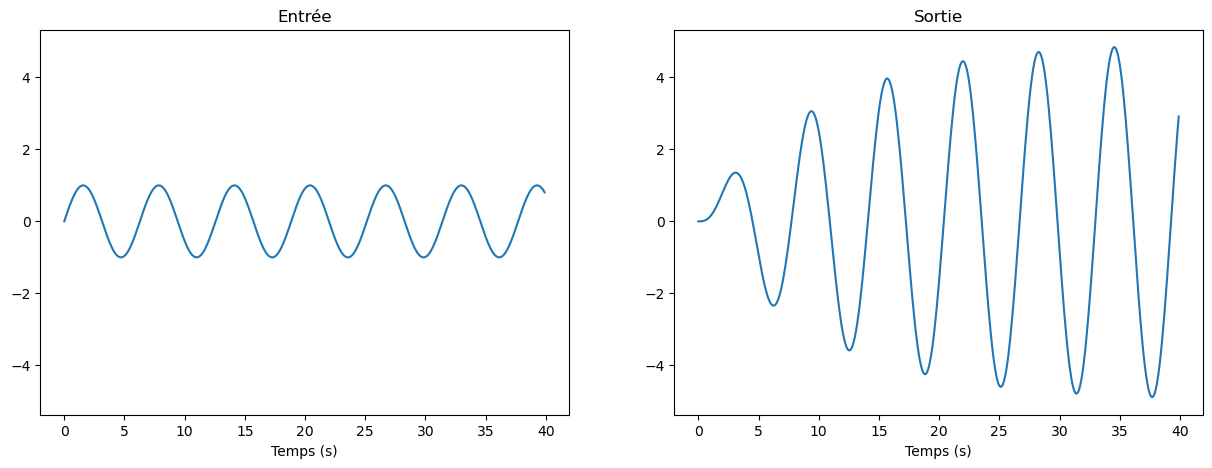

In [2]:
#Période du signal sinusioidale (changez pour observer l'impact sur le signal de sortie)
P_sin=1

num = [1]
den = [1, 0.2, 1]

H = signal.TransferFunction(num,den)

t = np.arange(0,40,0.1)
x = np.sin(P_sin*t)

tout, y, xout = signal.lsim(H, x, t)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,x)
ax1.set_title("Entrée")
ax1.set_xlabel("Temps (s)")

ax2 = plt.subplot(1,2,2, sharey=ax1)
ax2.plot(t,y)
ax2.set_title("Sortie")
ax2.set_xlabel("Temps (s)")


La figure ci-dessous montre maintenant le même système, mais dans le cas où le signal d’entrée est une fonction triangulaire périodique. On observe que cette fois-ci, la sortie est nettement différente de l’entrée.


Text(0.5, 0, 'Temps (s)')

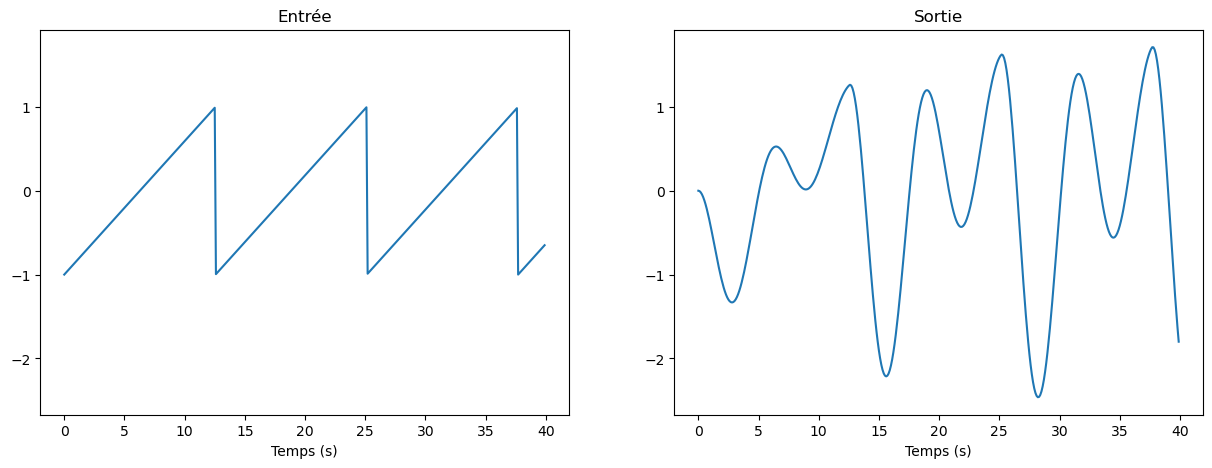

In [3]:
#Période du signal triangulaire (changez pour observer l'impact sur le signal de sortie)
P_tri=0.5

triangle = signal.sawtooth(P_tri*t, 1)

tout, y_triangle, xout = signal.lsim(H, triangle, t)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(t,triangle)
ax1.set_title("Entrée")
ax1.set_xlabel("Temps (s)")

ax2 = plt.subplot(1,2,2, sharey=ax1)
ax2.plot(t,y_triangle)
ax2.set_title("Sortie")
ax2.set_xlabel("Temps (s)")

On comprend donc que la sinusoïde est un signal qui va jouer un rôle important dans l’analyse des systèmes et des signaux. 

Une autre représentation d’un système LTI est sa réponse impulsionnelle $h(t)$. Physiquement, la réponse impulsionnelle est la sortie mesurée après une impulsion forte et de très courte durée en entrée. La résonnance d’une cloche suite à un coup de marteau est sa réponse impulsionnelle. De même, en donnant une brève impulsion (une « pichnotte ») à une masse suspendue à un ressort, on mesure la réponse impulsionnelle du système masse-ressort.

A première vue, la fonction de transfert $H(s)$ et la réponse impulsionnelle $h(t)$ d’un système contiennent des informations très différentes (la première, une information fréquentielle, et la seconde, une information temporelle). Et pourtant, $H(s)$ et $h(t)$ contiennent la même information. On verra en effet que $H(s)$ et $h(t)$ sont reliées par la **Transformée de Laplace** : on prenant la Tranformée de Laplace de $h(t)$, on obtient $H(s)$. 

Pour l’instant, on peut voir le lien entre $H(s)$ et $h(t)$ d’une autre façon. Considérez une impulsion pure, i.e. un signal nul partout dans le temps, sauf à t=0 où il prend une valeur très grande (infinie…). On peut construire une telle impulsion en sommant des sinusoïdes de toutes les fréquences. La figure suivante montre quelques sinusoïdes (des cosinus) de phase nulle et d’amplitude unitaire. L’axe horizontal est l’axe temporel.

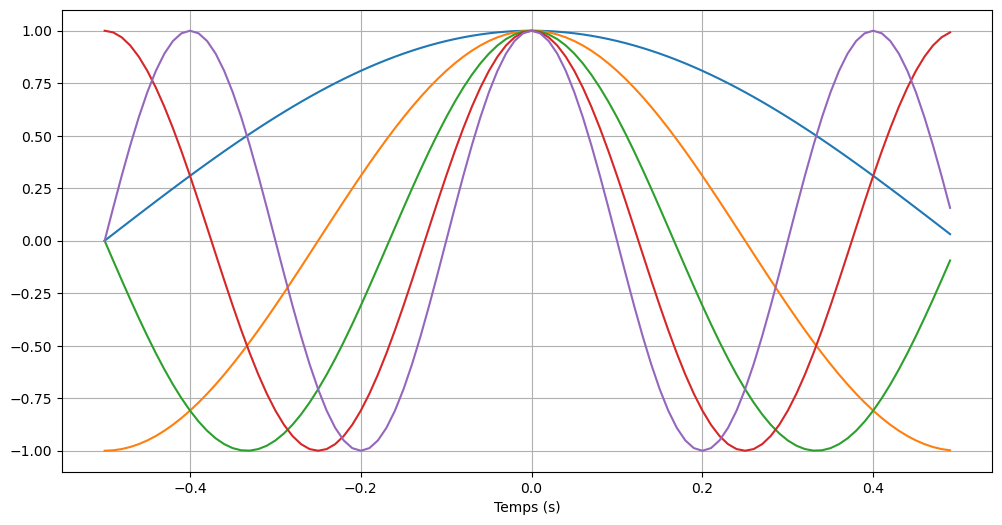

In [4]:
t = np.arange(-0.5, 0.5, 0.01)
x1 = np.cos(np.pi*t)
x2 = np.cos(2*np.pi*t)
x3 = np.cos(3*np.pi*t)
x4 = np.cos(4*np.pi*t)
x5 = np.cos(5*np.pi*t)

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(6)

ax1 = plt.subplot(1,1,1)
ax1.plot(t,x1)
ax1.plot(t,x2)
ax1.plot(t,x3)
ax1.plot(t,x4)
ax1.plot(t,x5)
ax1.set_xlabel("Temps (s)")
plt.grid(True)

On remarque qu’à t=0, tous ces cosinus passent par le même point (ils sont tous en phase à $t=0$). Ailleurs dans le temps, chaque cosinus passe par des valeurs différentes, certaines positives et d’autres négatives. Ainsi, en additionant plusieurs cosinus, on devrait avoir une très grande valeur à l’origine ($t=0$) puisqu’ils s’additionnent tous de façon constructive à ce moment. Par contre, lorsque $t \neq 0$, la somme des cosinus devrait (intuitivement) être petite puisque des valeurs positives et négatives vont s’additionner. Effectivement, en prenant un nombre de plus en plus grand de cosinus, la somme tend vers une impulsion pure à $t=0$, comme le montrent les figures suivantes où $K$ est le nombre de cosinus additionnés ensemble (pour être plus précis, on additionne les $K$ premières harmoniques de période fondamentale $T=1$ seconde --- nous reviendrons à l’impact de ce détail…).

Text(0.5, 0, 'Temps (s)')

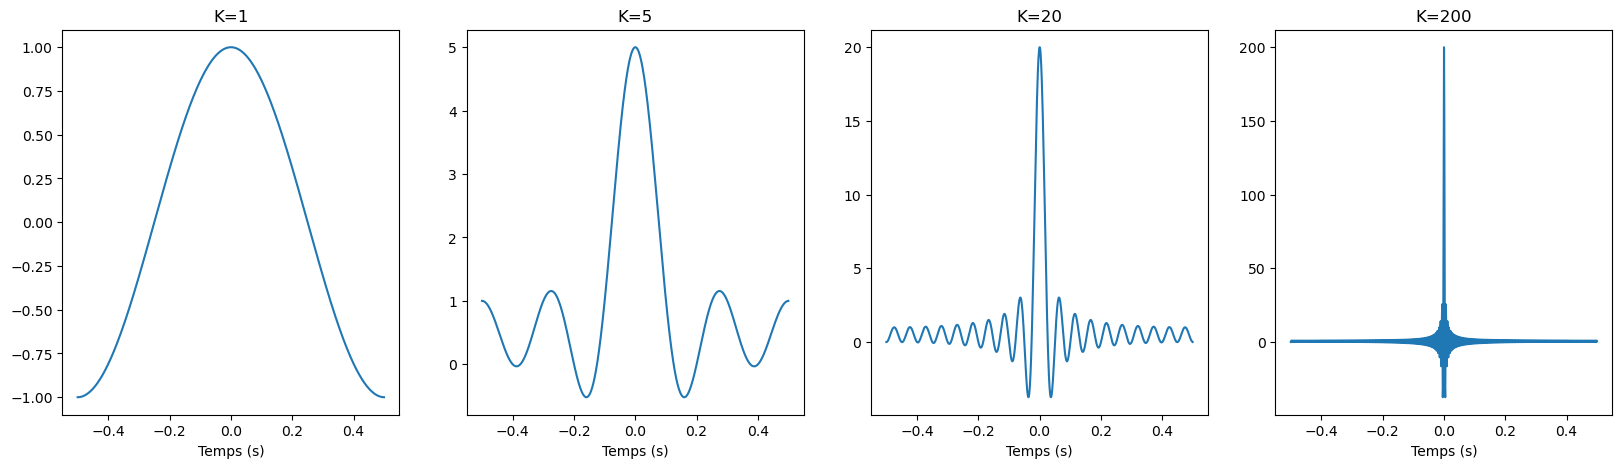

In [5]:
def sum_cos(k,t):
    y = np.zeros_like(t)
    for i in range(k):
        y += np.cos(i*2*np.pi*t)
    return y

t = np.arange(-0.5, 0.5, 0.001)
x_k1 = np.cos(2*np.pi*t)
x_k5 = sum_cos(5, t)
x_k20 = sum_cos(20, t)
x_k200 = sum_cos(200, t)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

ax1 = plt.subplot(1,4,1)
ax1.plot(t,x_k1)
ax1.set_title("K=1")
ax1.set_xlabel("Temps (s)")

ax1 = plt.subplot(1,4,2)
ax1.plot(t,x_k5)
ax1.set_title("K=5")
ax1.set_xlabel("Temps (s)")

ax1 = plt.subplot(1,4,3)
ax1.plot(t,x_k20)
ax1.set_title("K=20")
ax1.set_xlabel("Temps (s)")

ax1 = plt.subplot(1,4,4)
ax1.plot(t,x_k200)
ax1.set_title("K=200")
ax1.set_xlabel("Temps (s)")



On arrive ainsi à la conclusion suivante : une impulsion pure est égale à la somme de cosinus à toutes les fréquences, de phase nulle et d’amplitude constante. Autrement dit, **une impulsion contient toutes les fréquences en même temps.**

Quel est l’impact pour les systèmes LTI? Simplement ceci : puisque l’impulsion pure est la somme de toutes les fréquences, la réponse à l’impulsion pure (réponse impulsionnelle $h(t)$) est donc la réponse simultanée à toutes les fréquences (principe de linéarité). La figure ci-dessous illustre ce principe. $h(t)$ contient donc bien toute l’information fréquentielle contenue dans $H(s)$ --  il faut juste aller la chercher, i.e. prendre la transformée de $h(t)$.

On a donc maintenant deux représentations d’un système : sa fonction de transfert $(s)$, et sa réponse impulsionnelle $h(t)$. Ce sont deux « points de vue » différents du même système, qui contiennent la même information. Cette notion de « représentation » est très importante. On n’invente rien de nouveau en considérant $h(t)$ au lieu de $H(s)$, on ne fait que traduire la même information dans un format différent. L’application va nous dicter la forme la plus utile de représentation du système. Par exemple, pour calculer rapidement la réponse du système à une sinusoïde pure, la fonction de transfert $H(s)$ est la meilleure représentation pusqu’elle donne directement le gain et le déphasage du système pour toute fréquence. Par contre, pour avoir une bonne idée de la forme d’une transitoire (par exemple, la réponse à une fonction échelon ou à une onde carrée), la réponse impulsionnelle $h(t)$ donne directement la forme temporelle désirée. On verra aussi que $h(t)$ est au centre de l’opération de convolution, qui donne la relation entrée-sortie d’un système LTI. 

### Autres propriétés importantes du système

#### Mémoire
Un système sera considéré à mémoire si la valeur instantanée de la sortie dépend de la valeur passée du signal d’entrée ou du signal de sortie. Une résistance est un exemple de système sans mémoire, alors qu’on condensateur est un système avec mémoire. La plupart des systèmes traités seront avec mémoire.

#### Inversibilité
Un système est inversible si à une entrée donnée correspond une seule et unique sortie. 

#### Causalité
Un système est causal si la sortie ne dépend pas du futur de l’entrée. Un système physique ne peut être que causal…

#### Stabilité
Un système est stable si un signal petit et de durée finie en entrée ne produit pas un signal divergent et de durée infinie en sortie. La stabilité des systèmes est un élément très important à prendre en compte lors de leur conception.


## Interconnexion de systèmes

On décompose souvent un système en sous-systèmes de façon à faciliter son analyse ou sa conception. On retrouve ainsi plusieurs sous-systèmes interconnectés, qui forment ensemble le système complet. Ces sous-systèmes peuvent être interconnectés de plusieurs façons. Les trois modes principaux d’interconnections sont : en série, en parallèle, et avec rétroaction (feedback). Ceci est illustré dans les figures ci-dessous, où les systèmes et les signaux sont représentés dans le domaine de Laplace (fonction de transfert $H(s)$ pour les systèmes, Transformée de Laplace pour les signaux).

![Interconnexion](Images/02_Interconnexion.png)

On montre facilement que la fonction de transfert totale de chacun de ces systèmes est :
$$H(s) = H_1 (s) H_2 (s) $$

<p style="text-align: center;">pour le système interconnecté en série;</p>

$$H(s) = H_1 (s) + H_2 (s) $$

<p style="text-align: center;">pour le système interconnecté en parallèle;</p>


$$H(s) = \frac{H_1 (s) }{1 + H_1 (s) H_2 (s)} $$

<p style="text-align: center;">pour le système avec rétroaction.</p>


### Propriétés et manipulation de signaux

Nous allons maintenant porter notre attention aux signaux, à leur représentation dans le temps et dans les fréquences, et à quelques propriétés importantes.

#### Signaux périodiques

Une classe importante de signaux est formée des signaux périodiques. Par définition, un signal périodique est un signal ayant une période fondamentale, qui se répète identiquement jusqu’à l’infini. Une sinusoïde pure est un exemple de signal périodique.

La figure ci-dessous montre un exemple de sinusoïde, de période T = 20 ms. Ce signal se répète de façon parfaitement périodique, de sorte qu’il est entièrement définit par une seule période (la période fondamentale). Remarquez que pour décrire complètement le signal, il suffit d’en prendre une seule période, qui commence n’importe où – l’important est d’avoir une période entière.

Une représentation équivalente (et qui sera très utile) d’un signal périodique est son spectre de fréquences (ou spectre de Fourier). Il s’agit alors de représenter non pas le signal temporel lui-même (comme la figure de gauche), mais plutôt l’énergie que l’on retrouve dans le signal à chaque fréquence. L’axe horizontal est alors l’axe des fréquences. Pour la sinusoïde pure, la seule fréquence présente est à $1/T = 1/0.020 = 50 \text{ Hz}$. Ainsi, le spectre de fréquence devrait être très simple – une seule « raie », à la position 50 Hz. Ceci est illustré à la figure de droite ci-dessous, qui montre le module du spectre de Fourier de la sinusoïde à gauche. On verra plus tard (chapitre sur les séries de Fourier) quelle devrait être l’amplitude de cette « raie spectrale » dans le cas du spectre d’une sinusoïde pure. On verra aussi la notion de spectre de phase.


Text(0.5, 0, 'Fréquence (Hz)')

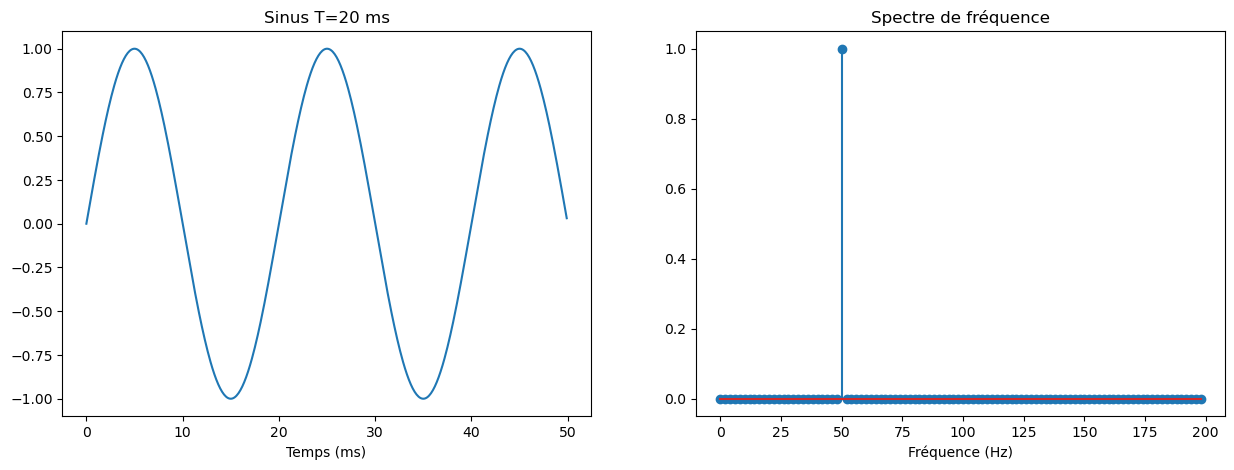

In [6]:
T = 0.02
dt = 0.0001
t = np.arange(0, 0.5, dt)
x = np.sin((1/T)*2*np.pi*t)

scale_t = 10
scale_f = 50

N = np.shape(t)[0]
xf = fft.fft(x)
tf = fft.fftfreq(N, dt)[:N//scale_f]

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(1000*t[0:N//scale_t],x[0:N//scale_t])
ax1.set_title("Sinus T=20 ms")
ax1.set_xlabel("Temps (ms)")

ax1 = plt.subplot(1,2,2)
ax1.stem(tf,2.0/N* np.abs(xf[0:N//scale_f]))
ax1.set_title("Spectre de fréquence")
ax1.set_xlabel("Fréquence (Hz)")

Les représentation temporelle (sinusoïde) et fréquentielle (spectre de Fourier) sont deux points de vues du même objet (i.e. le signal). **Il faut insister sur ce point** : on peut décrire un signal dans le temps, ou dans les fréquences, mais on a dans les deux cas **la même information**. (Un peu comme $h(t)$ et $H(s)$ qui donnent, dans deux formes différentes – temporelle et fréquentielle -- la même information d’un système).

La figure de gauche ci-dessous montre maintenant la somme de deux sinusoïdes pures, la première à 50 Hz et la secondes à 130 Hz :

>$x(t) = \sin\left(2\pi50t\right) + \cos\left(2\pi130t\right)$

On ne voit pas à première vue de période dans ce signal (bien qu’il est formé de la somme de deux signaux périodiques – deux sinusoïdes). En fait, la période d’un signal formé de la somme de signaux périodiques est le plus petit commun multiple des périodes individuelles. Ici, la période devrait donc être le plus petit commun multiple entre 20 ms ($\frac{1}{50}*1000$) et 7.7 ms ($\frac{1}{130}*1000$). Ce n’est pas simple de trouver un facteur commun, mais en prenant $7.7*20$, on tombe sur la valeur 200.2 ms, qui est presque un multiple entier de 50 ms. Ainsi, la période commune devrait être très grande, c’est pourquoi on n’observe pas de période commune sur la figure ci-haut.

Quel devrait être le spectre de fréquences de ce signal? Puisqu’on a deux sinusoïdes (de même amplitude – voir plus haut), on ne devrait voir que deux « raies spectrales », la première à 50 Hz et la seconde à 130 Hz. C’est ce que montre la figure de droite.



Text(0.5, 0, 'Fréquence (Hz)')

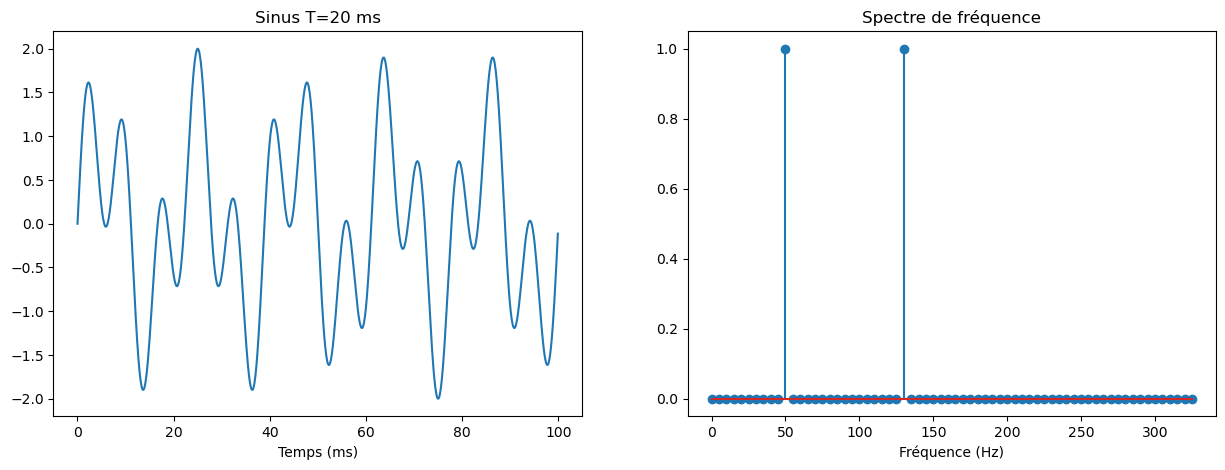

In [7]:
dt = 0.0001
t = np.arange(0, 0.2, dt)

f1 = 50
f2 = 130
x = np.sin(f1*2*np.pi*t) + np.sin(f2*2*np.pi*t)

scale_t = 2
scale_f = 30

N = np.shape(t)[0]
xf = fft.fft(x)
tf = fft.fftfreq(N, dt)[:N//scale_f]

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

ax1 = plt.subplot(1,2,1)
ax1.plot(1000*t[0:N//scale_t],x[0:N//scale_t])
ax1.set_title("Sinus T=20 ms")
ax1.set_xlabel("Temps (ms)")

ax1 = plt.subplot(1,2,2)
ax1.stem(tf,2.0/N* np.abs(xf[0:N//scale_f]))
ax1.set_title("Spectre de fréquence")
ax1.set_xlabel("Fréquence (Hz)")

On peut donc résumer en disant que le spectre de fréquences est le résultat d’une analyse qui indique à quelle(s) fréquence(s) se situe l’énergie du signal. En général, un signal sera beaucoup plus complexe que les deux exemples précédents. La figure suivante donne un exemple de signal de parole, d’une durée de 65 ms.

![Parole](Images/02_Parole.png)

On remarque un niveau de périodicité (dû à la vibration des cordes vocales). Ceci laisse supposer que le signal doit être formé (du moins en partie) de la somme de signaux périodiques, en fait de la somme de sinusoïdes. Effectivement, le module du spectre de fréquences de ce signal de parole est montré sur la figure suivante.

![Parole Spectre](Images/02_Parole_spectre.png)

On observe ainsi que ce segment de signal de parole est formé, en première analyse, de la somme de 4 sinusoïdes, respectivement à (environ) 290, 580, 870 et 1160 Hz. Ces 4 sinusoïdes, de fréquences régulièrement espacées, sont appelées des harmoniques. La période commune de ces harmoniques est la période qui correspond à la plus petite fréquence – la période fondamentale. Ici, la période fondamentale est $\frac{1}{290}$ = 3.4 ms environ. Sur le signal temporel, on voit effectivement qu’il comporte un peu moins de 3 périodes dans 10 ms, ce qui correspond bien à une période de 3.4 ms.

Notez que les raies spectrales de ce signal de parole ne sont pas aussi étroites que les raies spectrales de sinusoïdes pures (voir plus haut). Ceci a plusieurs causes. La raison principale est que le signal de parole observé varie dans sa durée de 65 ms, de sorte que ce ne sont pas tout à fait les mêmes sinusoïdes (pas exactement les mêmes fréquences) au début et à la fin du signal. Ceci élargie les raies spectrales observées.

Nous verrons dans le chapitre sur les séries de Fourier comment on peut « extraire » l’information spectrale d’un signal temporel. Pour l’instant, il suffit de retenir que le spectre de fréquences (ou spectre de Fourier) montre l’énergie du signal pour chaque fréquence. C’est pour cette raison que le spectre d’une sinusoïde pure donne une seule raie spectrale – il n’y a qu’une sinusoïde présente, ce qui concentre l’énergie à une seule fréquence dans le spectre.

Disons en terminant qu’un signal $x(t)$ est périodique si on peut écrire
>$x(t) = x(t+kT)$

où $k$ est un entier quelconque et $T$ est la période du signal. Ainsi, tel que spécifié au début de cette section, un signal périodique est entièrement déterminé par sa période fondamentale de durée $T$, puisqu’on peut calculer ses valeurs à l’extérieur de la période fondamentale avec l’équation ci-haut.

#### Manipulation des signaux

Cette section présente quelques éléments de formalisme sur la manipulation (mathématique) des signaux. Essentiellement, il s’agit de transformer la variable indépendante (le temps $t$), afin de modifier le signal de façon appropriée.

En multipliant la variable $t$ par un facteur différent de 1, on peut dilater ou contracter ce signal. Par exemple, la prochaine figure montre comment compresser le signal en multipliant l’échelle des temps par un facteur plus grand que 1. La figure de gauche montre $x(t)$, celle du milieu, $x(2t)$ et celle de droite $x(\frac{t}{2})$.


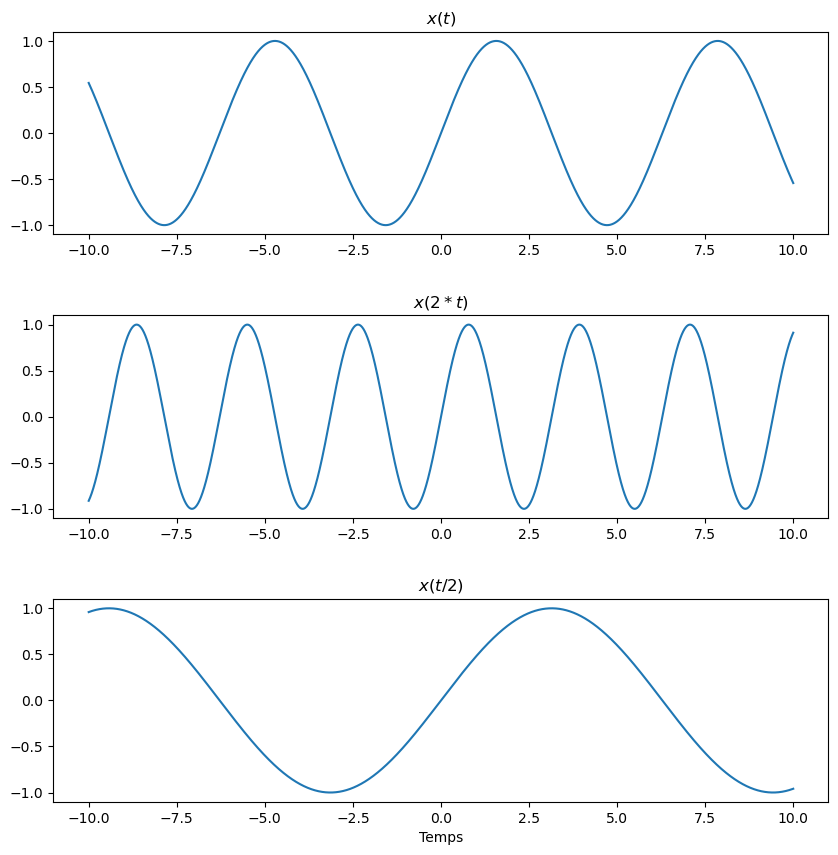

In [8]:
t = np.arange(-10,10,0.001)
x1 = np.sin(t)
x2 = np.sin(2*t)
x3 = np.sin(t/2)
        
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

ax1 = plt.subplot(3,1,1)
ax1.plot(t, x1)
ax1.set_title("$x(t)$")

ax1 = plt.subplot(3,1,2)
ax1.plot(t, x2)
ax1.set_title("$x(2*t)$")

ax1 = plt.subplot(3,1,3)
ax1.plot(t, x3)
ax1.set_title("$x(t/2)$")
ax1.set_xlabel("Temps")
f.subplots_adjust(hspace=0.4)

Pour les décalages temporels, il suffit d’ajouter un terme (« offset ») à l’échelle des temps. Un *offset* positif signifie un décalage vers la gauche (une avance), et un *offset* négatif signifie un décalage vers la droite (un retard). On se trompe régulièrement avec ce signe. Pensez donc plutôt en termes d’avance (*offset* positif donc décalage vers la gauche) ou de retard (*offset* négatif donc décalage vers la droite).

On montre ci-dessous les signaux $x(t)$, $x(t+1)$ et $x(t-1)$ :

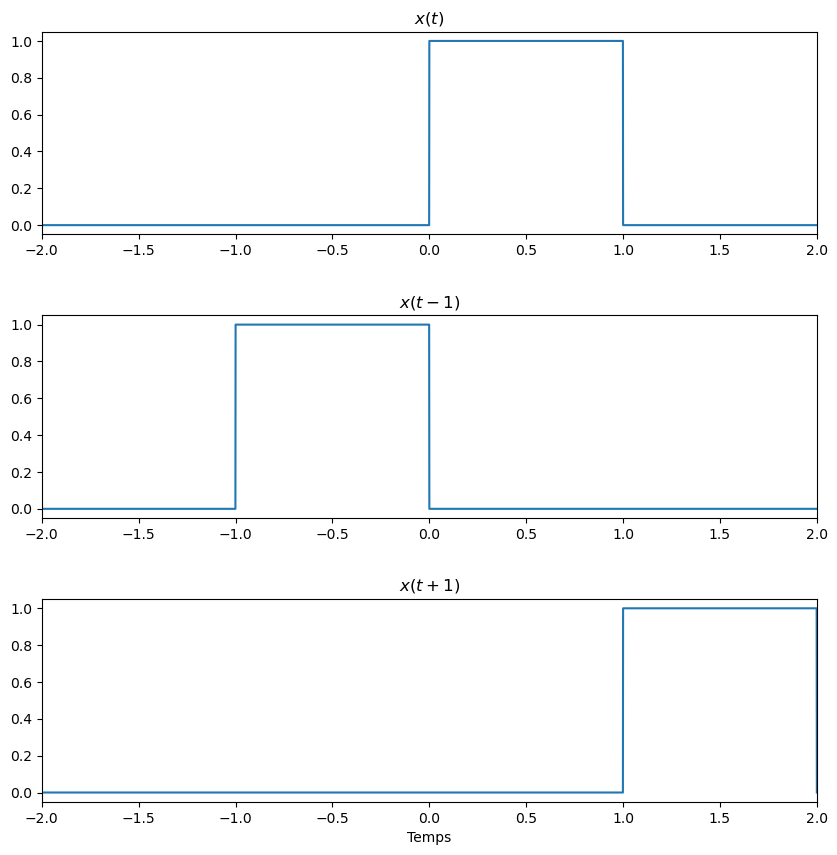

In [9]:
t = np.arange(-5,5,0.001)
x1 = np.zeros_like(t)
x1[5000:6000] = 1.0

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

ax1 = plt.subplot(3,1,1)
ax1.plot(t, x1)
ax1.set_title("$x(t)$")
ax1.set_xlim([-2,2])

ax1 = plt.subplot(3,1,2)
ax1.plot(t-1, x1)
ax1.set_title("$x(t-1)$")
ax1.set_xlim([-2,2])

ax1 = plt.subplot(3,1,3)
ax1.plot(t+1, x1)
ax1.set_title("$x(t+1)$")
ax1.set_xlabel("Temps")
ax1.set_xlim([-2,2])
f.subplots_adjust(hspace=0.4)

Une dernière propriété importante de certains signaux est la parité. Cette propriété va également se retrouver lorsqu’on étudiera de plus près les spectres de Fourier.

Un signal (ici, un signal temporel) est pair si:

>$x(-t) = x(t)$

et il est impair si:

>$x(-t) = -x(t)$

Vérifiez par exemple que le signal $\cos(5t)$ est un signal pair et que le signal $\sin(5t)$ est un signal impair.

Tout signal peut être décomposé en une partie paire et une partie impaire, ce que l’on écrit :

>$x(t) = x_p(t) + x_i(t)$

Pour déterminer $x_p(t)$ et $x_i(t)$, les parties paire et impaire, il suffit de noter que :

>$x_p(-t) = x_p(t)$

puisque celui-ci est pair, et que :

>$x_i(-t) = -x_i(t)$.

puisque celui-ce est impair. Ainsi, on peut écrire les deux équations suivantes :

>$x(t) = x_p(t) + x_i(t)$

>$x(-t) = x_p(-t) - x_i(-t)$

En résolvant ces deux équations pour $x_p(t)$ et $x_i(t)$, on trouve :

>$x_p(t) = 0.5*\left[ x(t) + x(-t)\right]$

et 

>$x_i(t) = 0.5*\left[ x(t) - x(-t)\right]$

*i.e.* que la partie paire de $x(t)$ est égale à la demi-somme de $x(t)$ et de sa version inversée dans le temps, $x(-t)$, et que la partie impaire de $x(t)$ est égale à la demi-différence de ces mêmes signaux.

Les figures suivantes illustrent ceci.

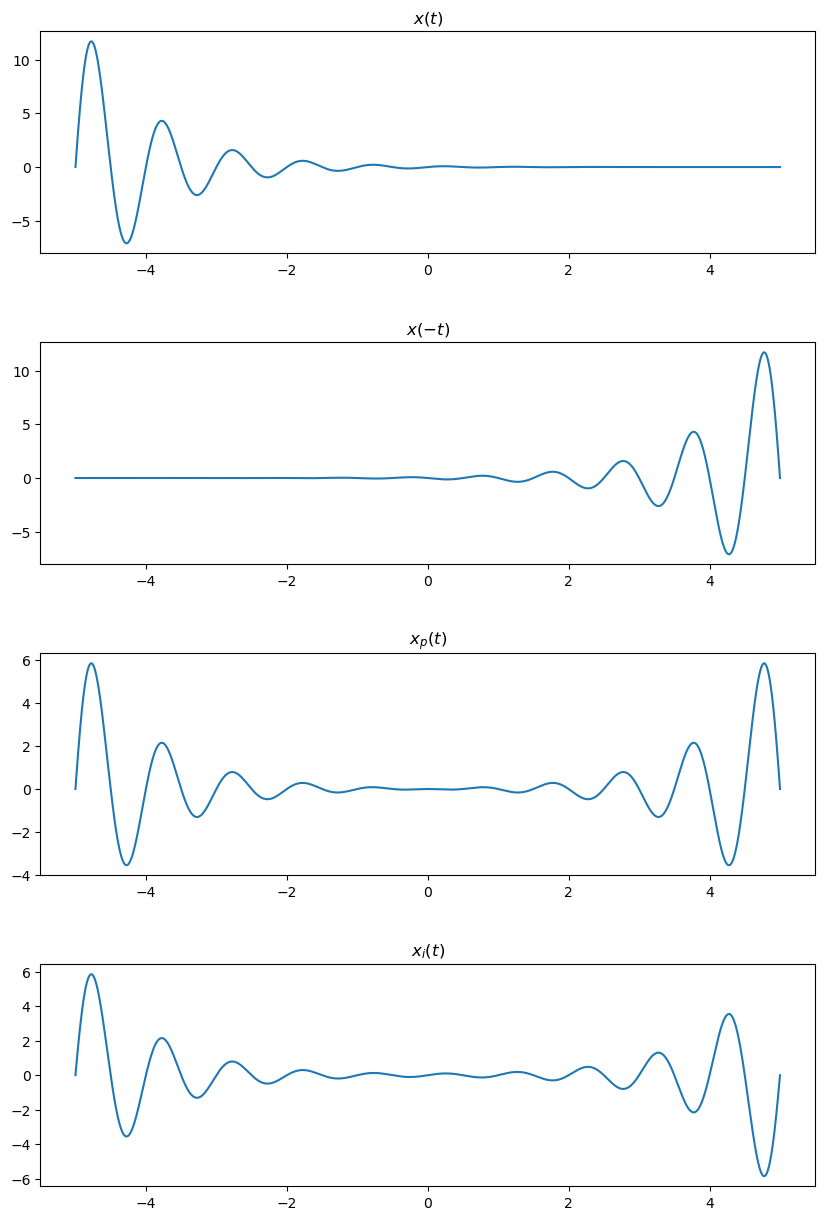

In [10]:
t = np.arange(-5,5,0.001)
x = np.exp(-t)*np.sin(2*np.pi*t)/10

#Equivalent à x(-t) car nous sommes centré à 0)
x_inv = np.flip(x)

x_p = 0.5*(x + x_inv)
x_i = 0.5*(x - x_inv)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(15)

ax1 = plt.subplot(4,1,1)
ax1.plot(t, x)
ax1.set_title("$x(t)$")

ax1 = plt.subplot(4,1,2)
ax1.plot(t, x_inv)
ax1.set_title("$x(-t)$")

ax1 = plt.subplot(4,1,3)
ax1.plot(t, x_p)
ax1.set_title("$x_p(t)$")

ax1 = plt.subplot(4,1,4)
ax1.plot(t, x_i)
ax1.set_title("$x_i(t)$")
f.subplots_adjust(hspace=0.4)

#### Énergie et Puissance

Une information importante d’un signal est son énergie et sa puissance (énergie par unité de temps). L’énergie d’un signal $x(t)$, sur un intervalle $t_1$ à $t_2$, est définie mathématiquement comme suit :

$$
E=\int_{t_1}^{t_2}|x(t)|^2 d t
$$

Sur le même intervalle, la puissance est définie comme suit :

$$
P=\frac{1}{t_2-t_1} \int_{t_1}^{t_2}|x(t)|^2 d t
$$

Ainsi, la puissance apparaît simplement comme l’énergie par unité de temps.


On comprend bien que pour des signaux de durée infinie et dont l’amplitude ne tend pas vers zéro (exemple : une sinusoïde), l’énergie prend une valeur infinie. Ainsi, seule la puissance du signal aura un sens dans ce cas. Pour un signal périodique, en fait, on donne souvent la puissance mesurée sur une période ($t_2 – t_1$ = la période du signal).

Une des conditions de stabilité d’un système LTI est que sa réponse impulsionnelle doit d’énergie finie (i.e. qu’elle ne diverge pas).

